<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw12_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to find $E[\hat V_{10}^{2}]$ via OMC. So, we do that. Import numpy module.

In [0]:
import numpy as np
import scipy.optimize as so
import scipy.integrate as si
import matplotlib.pyplot as plt

In [0]:
def omc_v10_sq(n):
  v_vec = np.zeros(n) # n entries
  for j in range(n):
    indic_sum = 0 #Initialize summation of the indicator
    for i in range(10):
      z = np.random.normal(0,1) #Generate Z_i
      if z < -2:
        indic_sum = indic_sum + 1 #Increment the indicator, if criteria met
    v10 = indic_sum/10 #After incrementing sum, compute v-hat-10
    v_vec[j] = v10**2 #We want expected value fo v-hat-10 squared, so the entry
                      #In the vector is v10**2.
  return v_vec.mean()

In [26]:
out_1 = omc_v10_sq(1000)
out_2 = omc_v10_sq(2000)
out_3 = omc_v10_sq(100000)
print("OMC approximation for 1000 trials is: " + str(out_1))
print("OMC approximation for 2000 trials is: " + str(out_2))
print("OMC approximation for 100000 trials is: " + str(out_3))

OMC approximation for 1000 trials is: 0.0028900000000000006
OMC approximation for 2000 trials is: 0.0026600000000000005
OMC approximation for 100000 trials is: 0.002748600000000001


From this, the OMC approximation of $E[\hat V_{10} ^{2}]$ is roughly $0.0026$. Now, run Importance Sampling method.

In [0]:
def v10_is(n,b):
  # First, take N samples from N(-b, 1) where N() represents the Normal distribution.
  indic_sum = 0 # Empty sum to populate
  for i in range(n):
    x = np.random.normal(-b,1) #Generate a sample from N(-b, 1)
    if x < -2: # Increment sum if x_i < -2 (if not, summation term is 0)
      indic_sum = indic_sum + np.exp(x * b)
  v10 = np.exp(0.5 * (b**2)) * (1/10) * indic_sum
  return v10  

Given this importance sampling, compute $E[\hat V_{10}^{2}]$ as the average of a large number of trials.

In [0]:
def is_average(m,n,b):
  v10_is_vec = np.zeros(m)
  for i in range(m):
    v10_out = v10_is(n,b)
    v10_is_vec[i] = v10_out**2
  return v10_is_vec.mean()

In [29]:
is_out_1 = is_average(1000,10,2)
is_out_2 = is_average(2000,10,2)
is_out_3 = is_average(10000,10,2)

print("Importance Sampling output for m = 1000 is " + str(is_out_1))
print("Importance Sampling output for m = 2000 is " + str(is_out_2))
print("Importance Sampling output for m = 10000 is " + str(is_out_3))

Importance Sampling output for m = 1000 is 0.0006427882023040748
Importance Sampling output for m = 2000 is 0.0006453679021828602
Importance Sampling output for m = 10000 is 0.0006394703622656391


According to these, the IS output is very close to 0.0006. It's much smaller than the OMC value, but this could be due to the fact that OMC was using N(0, 1) for the underlying value rather than N(-b, 1).

#Optimizing Efficiency of Importance Sampling

We want to optimize the efficiency of the importance sampling, which means finding $b$ such that the MSE is minimized. First, observe that what we want to minimize is

$$E[(\hat\alpha - \alpha)^{2}]$$

Where $\alpha = $V which is what we wanted to find, and is about 0.02275 and $\hat \alpha$ is our estimator, $\hat V_{10}$. We can observe that for the importance sampling, $E[\hat V_{10}] = V$, so the function has no bias.

Thus, what we want to estimate is simply the variance of $\hat V_{10}$, or $E[\hat V_{10}^{2}] - E[\hat V_{10}]^{2}$ So we can consider that function:

$$E[\hat V_{10}^{2}] - E[\hat V_{10}]^{2} = E[(e^{\frac{1}{2}b^{2}}\frac{1}{10}\sum_{i=1}^{10}e^{x_{i}b}I[X_{i} < -2])^{2}] - 0.02275^{2}$$

$$ = e^{b^{2}}\frac{1}{100}E[(\sum_{i=1}^{10}e^{x_{i}b}I[X_{i} < -2])^{2}] - 0.02275^{2}$$

$$ = e^{b^{2}}\frac{1}{100}E[\sum_{i=1}^{10}\sum_{j=1}^{10}e^{x_{i}b + x_{j}b}I[X_{i} < -2]I[X_{j} < -2]] - 0.02275^{2}$$

Observe that there are 2 cases for the expectation of this summation: the case where $i = j$ and the case where $i \neq j$. Of the 100 elements in the summation, 10 of them are the former case and 90 are the latter. Thus,

$$E[\sum_{i=1}^{10}\sum_{j=1}^{10}e^{x_{i}b + x_{j}b}I(X_{i} < -2)I(X_{j} < -2)] = E[\sum_{i=1}^{10}e^{2x_{i}b}I(X_{i} < -2)] + E[\sum_{i=1}^{10}\sum_{j=1, j\neq i}^{10}e^{x_{i}b + x_{j}b}I(X_{i} < -2)I(X_{j} < -2)]$$

Consider each term separately. For the second summation, we know that $x_{i}$ and $x_{j}$ are independent and identically distributed as $N(-b, 1)$, that x_i and x_j are not dependent on $i$ and $j$, and that collectively there are 90 terms present.

$$E[\sum_{i=1}^{10}\sum_{j=1, j\neq i}^{10}e^{x_{i}b + x_{j}b}I(X_{i} < -2)I(X_{j} < -2)] = E[\sum_{i = 1}^{10}e^{x_{i}b}I(X_{i} < -2)]E[\sum_{j = 1, j \neq i}^{10}e^{x_{j}b}I(X_{j} < -2)] = 90(\int_{-\infty}^{-2}e^{xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^{2}}{2}})^2 dx$$

Now, simplify the integral:

$$\int_{-\infty}^{-2}e^{xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^{2}}{2}})^2 dx = \int_{-\infty}^{-2}e^{xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x^{2} + 2xb + b^{2})}{2}})^2 dx$$

$$ = \int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x^{2} + b^{2})}{2} + xb - \frac{2xb}{2}} dx = \int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x^{2} + b^{2})}{2}} dx$$

$$ = e^{\frac{-b^{2}}{2}}\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} dx$$

Thus, we have that

$$ (\int_{-\infty}^{-2}e^{xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^{2}}{2}})^2 dx = e^{-b^{2}}(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} dx)^{2}$$

As we are looking to minimize the MSE as a function of $b$, we do not need to simplify this further. The function we will be looking to minimize is

$$f(b) = e^{b^{2}}\frac{1}{100}E[\sum_{i=1}^{10}\sum_{j=1}^{10}e^{x_{i}b + x_{j}b}I[X_{i} < -2]I[X_{j} < -2]] - 0.02275^{2}$$

The expectation, as we have shown, expands into 2 separate terms. The above result, $e^{-b^{2}}(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} dx)^{2}$, will be the simplification of one of the terms. The $e^{-b^{2}}$ term present will cancel with the leading coefficient of $e^{b^{2}}$, so this term in the function will be a constant with respect to $b$. Thus, the first derivative with respect to $b$ will be 0 for this term. Therefore, we do not need to simplify the square of the integral further.

Now, consider the other term of the summation, where $i = j$. Here, we will have 10 entries.

$$E[\sum_{i=1}^{10}e^{2x_{i}b}I(X_{i} < -2)] = 10\int_{-\infty}^{-2}e^{2xb}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x+b)^{2}}{2}} = 10\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{-\frac{(x^{2} + b^{2})}{2} + 2xb - \frac{2xb}{2}}dx$$

$$ = 10\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}dx$$

We cannot really simplify this further, but this is sufficient. Given this, we can compute the derivative of $f$ with respect to $b$. Thus,

$$f(b) = e^{b^{2}}\frac{1}{100}[10\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}dx + 90e^{-b^{2}}(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} dx)^{2}] - 0.02275^{2}$$

$$ = e^{b^{2}}\frac{1}{10}[\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}dx] + \frac{9}{10}(\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} dx)^{2} - 0.02275^{2}$$

Now, take the derivative with respect to $b$.

$$f'(b) = \frac{2}{10}be^{b^{2}}\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}dx + \frac{1}{10}e^{b^{2}}\int_{-\infty}^{-2}\frac{\partial f}{\partial b}(\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}})dx$$

$$ = \frac{2}{10}be^{b^{2}}\int_{-\infty}^{-2}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}dx + \frac{1}{10}e^{b^{2}}\int_{-\infty}^{-2}(\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2} + xb - \frac{b^{2}}{2}}(x - b))dx$$

We want to evaluate this to solve for 0, but this isn't an easily solvable function. Use python to solve it.

In [0]:
def fprime(b):
  coef_1 = 0.2 * b * np.exp(b**2)
  intarg_1 = lambda x: 1/np.sqrt(2*np.pi) * np.exp((-1*(x**2)/2) + (x*b) - ((b**2)/2))
  
  integral_1 = si.quad(intarg_1,-np.inf, -2)
  
  coef_2 = 0.1 * np.exp(b**2)
  intarg_2 = lambda x: (1/np.sqrt(2*np.pi) * np.exp((-1*(x**2)/2) + (x*b) - ((b**2)/2)))*(x-b)
  
  integral_2 = si.quad(intarg_2, -np.inf, -2)
  
  term_1 = coef_1 * integral_1[0]
  term_2 = coef_2 * integral_2[0]
  
  return term_1 + term_2

In [68]:
so.fsolve(fprime, 2)

array([2.21592996])

This suggests that the zero value is roughly 2.216=. Let's attempt to graph $f'(b)$ from 0 to 3 to see if this matches.

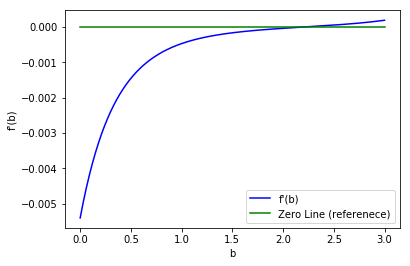

In [58]:
b_range = np.linspace(0, 3, 500)
f_vals = np.zeros(len(b_range))
zer_vals = np.zeros(len(b_range))
for i in range(len(b_range)):
  f_vals[i] = fprime(b_range[i])

plt.plot(b_range, f_vals,'b',b_range, zer_vals, 'g')
plt.xlabel("b")
plt.ylabel("f'(b)")
plt.legend(["f'(b)", "Zero Line (referenece)"])

This matches up. Define a function for $f$ and graph it on the interval $[0, 3]$ to see if it has a minimum around this value.

In [0]:
def f(b):
  coef_1 = 0.1 * np.exp(b**2)
  intarg_1 = lambda x: (1/np.sqrt(2*np.pi))*np.exp(((-1*(x**2))/2) + (x*b) - ((b**2)/2))
  
  integral_1 = si.quad(intarg_1, -np.inf, -2)
  
  coef_2 = 0.9
  intarg_2 = lambda x: (1/np.sqrt(2*np.pi))*np.exp(-1 * ((x**2)/2))
  integral_2 = si.quad(intarg_2, -np.inf, -2)
  
  term_1 = coef_1 * integral_1[0]
  term_2 = coef_2 * (integral_2[0] ** 2)
  term_3 = 0.02275**2
  
  return term_1 + term_2 - term_3

Text(0, 0.5, 'f(b)')

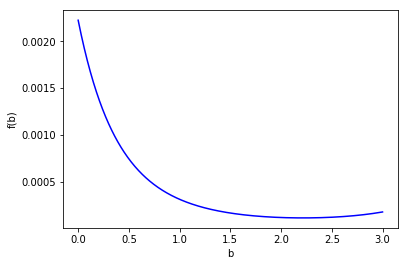

In [70]:
b_range = np.linspace(0, 3, 500)
f_vals = np.zeros(len(b_range))

for i in range(len(b_range)):
  f_vals[i] = f(b_range[i])

plt.plot(b_range, f_vals,'b')
plt.xlabel("b")
plt.ylabel("f(b)")

Graph again on $[2, 2.5]$ to see the minimum better.

Text(0, 0.5, 'f(b)')

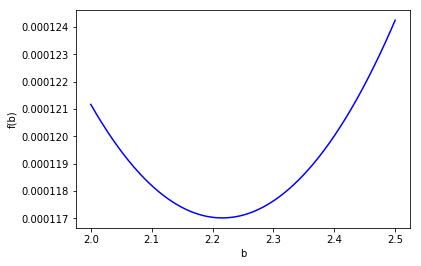

In [74]:
b_range = np.linspace(2, 2.5, 500)
f_vals = np.zeros(len(b_range))

for i in range(len(b_range)):
  f_vals[i] = f(b_range[i])

plt.plot(b_range, f_vals,'b')
plt.xlabel("b")
plt.ylabel("f(b)")

This matches up to what Python's solution is, so I am satisfied.